# IMPORT LIBRARY

In [1]:
conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.1                    py39_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39haa95532_2  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2           py39haa95532_0  
argon2-cffi               20.1.0           py39h2bbff1b_1  
arrow                     0.13.1           py39haa95532_0  
asn1crypto                1.4.0                      py_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   4.3.1            py39hc7d831d_0  
async_generator           1.10      

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib import cm

tzdata                    2021e                hda174b7_0  
ujson                     4.0.2            py39hd77b12b_0  
unicodecsv                0.14.1           py39haa95532_0  
unidecode                 1.2.0              pyhd3eb1b0_0  
urllib3                   1.26.7             pyhd3eb1b0_0  
vc                        14.2                 h21ff451_1  
vs2015_runtime            14.27.29016          h5e58377_2  
watchdog                  2.1.3            py39haa95532_0  
wcwidth                   0.2.5              pyhd3eb1b0_0  
webencodings              0.5.1            py39haa95532_1  
werkzeug                  2.0.2              pyhd3eb1b0_0  
wheel                     0.37.0             pyhd3eb1b0_1  
whichcraft                0.6.1              pyhd3eb1b0_0  
widgetsnbextension        3.5.1            py39haa95532_0  
win_inet_pton             1.1.0            py39haa95532_0  
win_unicode_console       0.5              py39haa95532_0  
wincertstore              0.2           

# LOAD DATA

In [3]:
df1 = pd.read_excel (r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Desa.xlsx.xlsx')
df2 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2018.xlsx')
df3 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2019.xlsx')
df4 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2020.xlsx')
df5 = pd.read_excel(r'D:\Bootcamp\DSLS\Dataset\Data KPK-20220202T083131Z-001\Data KPK\Desa\Penyerapan Dana Desa 2021.xlsx')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


# MERGE DATASET PENYERAPAN

In [4]:
df_penyerapan = pd.concat([df2, df3, df4, df5], ignore_index=True)
df_penyerapan

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1,persentase_realisasi_tahap_1,realisasi_tahap_2,persentase_realisasi_tahap_2,realisasi_tahap_3,persentase_realisasi_tahap_3
0,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pemberdayaan Masyarakat Desa,Pembentukan/Fasilitasi/Pelatihan/Pendampingan ...,0,0,0,0,2414000,100
1,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Penyelenggaraan Pos Kesehatan Desa (PKD)/Polin...,0,0,12800000,31,57619000,100
2,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah N...,0,0,4500000,13,21686000,100
3,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Fasilitas...,0,0,68434500,100,0,0
4,5105022008,2018,Aan,Bali,Kab. Klungkung,Banjarangkan,Pelaksanaan Pembangunan Desa,Pemeliharaan Jalan Usaha Tani,0,0,13474125,39,34027125,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2966556,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pemberdayaan Masyarakat Desa,Peningkatan kapasitas perangkat Desa,43603001,45,0,0,0,0
2966557,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",140406500,64,0,0,0,0
2966558,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,Penyusunan Dokumen Perencanaan Tata Ruang Desa,16775000,80,0,0,0,0
2966559,1225052019,2021,Zuzundrao,Sumatera Utara,Kab. Nias Barat,Mandrehe,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitas/Peningkatan Fasilitas ...,53526866,90,0,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298705 entries, 0 to 298704
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   nama_provinsi    298705 non-null  object
 1   nama_pemda       298705 non-null  object
 2   nama_desa        298705 non-null  object
 3   kode_pum         298705 non-null  object
 4   jumlah_kk        147490 non-null  object
 5   jumlah_penduduk  147490 non-null  object
 6   tahun            298704 non-null  object
 7   pagu             298704 non-null  object
 8   penyaluran       297635 non-null  object
dtypes: object(9)
memory usage: 20.5+ MB


# CHECK TYPE IN DATASET PENYERAPAN

In [6]:
df_penyerapan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966561 entries, 0 to 2966560
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   kode_desa                     int64 
 1   tahun                         int64 
 2   nama_desa                     object
 3   nama_provinsi                 object
 4   nama_pemda                    object
 5   nama_kecamatan                object
 6   nama_bidang                   object
 7   nama_kegiatan                 object
 8   realisasi_tahap_1             int64 
 9   persentase_realisasi_tahap_1  int64 
 10  realisasi_tahap_2             int64 
 11  persentase_realisasi_tahap_2  int64 
 12  realisasi_tahap_3             int64 
 13  persentase_realisasi_tahap_3  int64 
dtypes: int64(8), object(6)
memory usage: 316.9+ MB


# RENAME FEATURE IN DATASET PENYERAPAN

In [7]:
df_penyerapan.rename(
    columns={"realisasi_tahap_1":"realisasi_tahap_1_Rp",
            "realisasi_tahap_2":"realisasi_tahap_2_Rp",
            "realisasi_tahap_3":"realisasi_tahap_3_Rp"}
          ,inplace=True)

In [8]:
df_penyerapan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966561 entries, 0 to 2966560
Data columns (total 14 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   kode_desa                     int64 
 1   tahun                         int64 
 2   nama_desa                     object
 3   nama_provinsi                 object
 4   nama_pemda                    object
 5   nama_kecamatan                object
 6   nama_bidang                   object
 7   nama_kegiatan                 object
 8   realisasi_tahap_1_Rp          int64 
 9   persentase_realisasi_tahap_1  int64 
 10  realisasi_tahap_2_Rp          int64 
 11  persentase_realisasi_tahap_2  int64 
 12  realisasi_tahap_3_Rp          int64 
 13  persentase_realisasi_tahap_3  int64 
dtypes: int64(8), object(6)
memory usage: 316.9+ MB


# CHECK NAN VALUES IN DATASET PENYERAPAN

In [9]:
df_penyerapan.isna().sum()

kode_desa                          0
tahun                              0
nama_desa                       1015
nama_provinsi                   1015
nama_pemda                      1015
nama_kecamatan                  1015
nama_bidang                        0
nama_kegiatan                      0
realisasi_tahap_1_Rp               0
persentase_realisasi_tahap_1       0
realisasi_tahap_2_Rp               0
persentase_realisasi_tahap_2       0
realisasi_tahap_3_Rp               0
persentase_realisasi_tahap_3       0
dtype: int64

In [10]:
bool_series = pd.isnull(df_penyerapan["nama_desa"])
df_penyerapan[bool_series]

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3
752755,1812042009,2018,NaN,NaN,NaN,NaN,Penyelenggaraan Pemerintahan Desa,Penyusunan Dokumen Keuangan Desa (APBDes/ APBD...,3501000,100,0,0,7435000,100
752756,1403092020,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Prasarana...,0,0,2062941,100,0,0
752757,1703142006,2018,NaN,NaN,NaN,NaN,Pemberdayaan Masyarakat Desa,Peningkatan kapasitas BPD,0,0,2445000,100,0,0
752758,1601092029,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,199178500,100,0,0
752759,1601092016,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah N...,0,0,0,0,8600000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753765,7111012003,2018,NaN,NaN,NaN,NaN,Pemberdayaan Masyarakat Desa,Peningkatan Produksi Tanaman Pangan (Alat Prod...,0,0,82132000,94,0,0
753766,7111012003,2018,NaN,NaN,NaN,NaN,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,47400000,52,90590000,99,0,0
753767,1601092014,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,92642500,41,223685500,100
753768,3510132017,2018,NaN,NaN,NaN,NaN,Pelaksanaan Pembangunan Desa,Dukungan pelaksanaan program Pembangunan/Rehab...,0,0,112500000,86,130000000,100


# MAKE DATASET PENYERAPAN IN JAWA TIMUR

In [11]:
df_penyerapan_jatim = df_penyerapan.loc[df_penyerapan['nama_provinsi'] == 'Jawa Timur']
df_penyerapan_jatim = df_penyerapan_jatim.reset_index(drop=True)
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0


# EXPORT DATASET PENYERAPAN IN JAWA TIMUR

In [12]:
df_penyerapan_jatim.to_csv('D:\Bootcamp\DSLS\Dataset\Data_Final\jatim_dataset2.csv')

# CHECK UNIQUE VALUE IN DATASET PENYERAPAN IN JAWA TIMUR

In [13]:
df_penyerapan_jatim.nama_bidang.unique()

array(['Pelaksanaan Pembangunan Desa', 'Pembinaan Kemasyarakatan Desa',
       'Pemberdayaan Masyarakat Desa',
       'Penyelenggaraan Pemerintahan Desa',
       'Penanggulangan Bencana, Keadaan Darurat Dan Mendes', 'Pembiayaan'],
      dtype=object)

In [14]:
df_penyerapan_jatim.tahun.unique()

array([2018, 2019, 2020, 2021], dtype=int64)

In [15]:
df_penyerapan_jatim.nama_desa.unique()

array(['Abar-abir', 'Adan-adan', 'Aenganyar', ..., 'Mojongapit',
       'Mojowarno', 'Mudung'], dtype=object)

In [16]:
df_penyerapan_jatim.nunique()

kode_desa                        7722
tahun                               4
nama_desa                        5474
nama_provinsi                       1
nama_pemda                         30
nama_kecamatan                    572
nama_bidang                         6
nama_kegiatan                     281
realisasi_tahap_1_Rp            56605
persentase_realisasi_tahap_1      102
realisasi_tahap_2_Rp            68020
persentase_realisasi_tahap_2      107
realisasi_tahap_3_Rp            60331
persentase_realisasi_tahap_3      106
dtype: int64

In [17]:
df_penyerapan_jatim.persentase_realisasi_tahap_2.unique()

array([  0, 100,  47,  50,  99,  51,  39,  83,  31,  94,  98,  79,  70,
        60,  80,  20,  75,  62,  56,  55,  52,  40,  87,  90,  73,  15,
        21,  63,  23,  67,  46,  92,  64,  30,  68,  41,  82,   8,   6,
        85,  58,  34,  25,  54,   1,  53,  65,  95,  93,  45,  72,  76,
        29,   7,  10,  69,  88,  33,  18,  57,   2,  96,  91,  37,  13,
        48,  71,  44,  74,  27,  28,  43,  66,  49,   5,  36,  42,  32,
        59,  84,  24,  61,  86,  35,   3,  81,  89,  78,  38,  77,  97,
        16,  11,  22,  14,  26,  12,  19,  17,   9,   4, 980, 200, 141,
       921, 401, 117], dtype=int64)

In [18]:
df_penyerapan_jatim.nama_kegiatan.unique()

array(['Penyelenggaraan Posyandu (Makanan Tambahan, Kelas ',
       'Pembangunan/Rehabilitasi/Peningkatan Sanitasi Perm',
       'Pembangunan/Rehabilitasi/Peningkatan/Pengadaan Sar',
       'Pembangunan/Rehabilitasi/Peningkatan Sarana dan Pr',
       'Pembangunan/Rehabilitasi/Peningkatan Sistem Pembua',
       'Pembangunan/Rehabilitasi/Peningkatan/Pengerasan Ja',
       'Penyelenggaraan PAUD/TK/TPA/TKA/TPQ/Madrasah Non-F',
       'Kegiatan Pembangunan / Pemeliharaan Saluran Irigas',
       'Pengelolaan Lingkungan Hidup Desa',
       'Pembangunan Tembok Penahan Tanah',
       'Pengembangan Sistem Informasi Desa ',
       'Pelatihan/Penyuluhan Pemberdayaan Perempuan',
       'Dukungan pelaksanaan program Pembangunan/Rehab Rum',
       'Pemeliharaan Jalan Desa',
       'Kegiatan Pembentukan dan Fasilitasi Kader Pembangu',
       'Penyelenggaraan Pos Kesehatan Desa (PKD)/Polindes ',
       'Penyertaan Modal BUM Desa',
       'Pembangunan/Rehabilitasi/Peningkatan Prasarana Jal',
       'Pem

# MAKE FEATURE ENGINEERING ABOUT KETIDAKWAJARAN LAPORAN

In [19]:
df_penyerapan_jatim['ketidakwajaran_laporan'] = np.where(df_penyerapan_jatim['nama_kegiatan'] == 'tes', 1, 
                                                np.where((df_penyerapan_jatim['persentase_realisasi_tahap_1'] > 100) |
                                                        (df_penyerapan_jatim['persentase_realisasi_tahap_2'] > 100) |
                                                        (df_penyerapan_jatim['persentase_realisasi_tahap_3'] > 100), 1,
                                                np.where(((df_penyerapan_jatim['realisasi_tahap_1_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_2_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_3_Rp'] == 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 0)), 1,
                                                np.where((df_penyerapan_jatim['realisasi_tahap_1_Rp'] == 0) &
                                                        (df_penyerapan_jatim['realisasi_tahap_2_Rp'] == 0) &
                                                        (df_penyerapan_jatim['realisasi_tahap_3_Rp'] == 0), 1,
                                                np.where(((df_penyerapan_jatim['realisasi_tahap_1_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_2_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0)) |
                                                        ((df_penyerapan_jatim['realisasi_tahap_3_Rp'] != 0) &
                                                         (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 1,0)))))
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0,0
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0,0
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0,0
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100,0
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0,0
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0,1
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0,1
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0,0


# MAKE TOTAL PENYERAPAN IN DATA PENYERAPAN JAWA TIMUR

In [20]:
df_penyerapan_jatim['total_penyerapan'] = np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)),
                                                   df_penyerapan_jatim['realisasi_tahap_2_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 100)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp']
                                                   , (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] == 0) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)), 
                                                   df_penyerapan_jatim['realisasi_tahap_1_Rp'], (
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] == 0)),
                                                   df_penyerapan_jatim['realisasi_tahap_2_Rp'], ( 
                                          np.where(((df_penyerapan_jatim['persentase_realisasi_tahap_1'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_2'] != 100) &
                                                   (df_penyerapan_jatim['persentase_realisasi_tahap_3'] != 100)),
                                                   df_penyerapan_jatim['realisasi_tahap_3_Rp'],
                                                  df_penyerapan_jatim['realisasi_tahap_3_Rp'] + df_penyerapan_jatim['realisasi_tahap_2_Rp'] + df_penyerapan_jatim['realisasi_tahap_1_Rp'])))))))))))))))))))
df_penyerapan_jatim

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan,total_penyerapan
0,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",7000000,100,0,0,0,0,0,7000000
1,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sanitasi ...,9953000,100,0,0,0,0,0,9953000
2,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengadaan...,0,0,199600000,100,0,0,0,199600000
3,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pembinaan Kemasyarakatan Desa,Pembangunan/Rehabilitasi/Peningkatan Sarana da...,0,0,24087600,100,30098400,100,0,54186000
4,3525122011,2018,Abar-abir,Jawa Timur,Kab. Gresik,Bungah,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan Sistem Pe...,55481000,100,0,0,23000000,100,0,78481000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335904,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,Pemeliharaan Prasarana Jalan Desa (Gorong-goro...,4500000,100,0,0,0,0,0,4500000
335905,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pembinaan Kemasyarakatan Desa,Pembinaan PKK,20980000,0,0,0,0,0,1,20980000
335906,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pemberdayaan Masyarakat Desa,Pemeliharaan Pasar Desa/Kios milik Desa,3850000,0,0,0,0,0,1,3850000
335907,3518082002,2021,Yuwono,Jawa Timur,Kab. Nganjuk,Kertosono,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",4400000,13,0,0,0,0,0,4400000


In [21]:
df_penyerapan_jatim.loc[df_penyerapan_jatim['total_penyerapan'] == 0]

,kode_desa,tahun,nama_desa,nama_provinsi,nama_pemda,nama_kecamatan,nama_bidang,nama_kegiatan,realisasi_tahap_1_Rp,persentase_realisasi_tahap_1,realisasi_tahap_2_Rp,persentase_realisasi_tahap_2,realisasi_tahap_3_Rp,persentase_realisasi_tahap_3,ketidakwajaran_laporan,total_penyerapan
6050,3523122009,2018,Beji,Jawa Timur,Kab. Tuban,Jenu,Pelaksanaan Pembangunan Desa,"Penyelenggaraan Posyandu (Makanan Tambahan, Ke...",0,0,0,0,0,0,1,0
6216,3523062005,2018,Belikanget,Jawa Timur,Kab. Tuban,Tambakboyo,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitas/Peningkatan Fasilitas ...,0,0,0,0,0,0,1,0
6236,3516122003,2018,Beloh,Jawa Timur,Kab. Mojokerto,Trowulan,Pelaksanaan Pembangunan Desa,Pembangunan/Rehabilitasi/Peningkatan/Pengerasa...,0,0,0,0,0,0,1,0
6928,3523022007,2018,Besowo,Jawa Timur,Kab. Tuban,Jatirogo,Penyelenggaraan Pemerintahan Desa,Penyelenggaraan Lomba antar kewilayahan dan pe...,0,0,0,0,0,0,1,0
6947,3523022007,2018,Besowo,Jawa Timur,Kab. Tuban,Jatirogo,Pemberdayaan Masyarakat Desa,Penyertaan Modal BUM Desa,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334523,3501112014,2021,Wonodadi Wetan,Jawa Timur,Kab. Pacitan,Ngadirojo,Penyelenggaraan Pemerintahan Desa,Pelaksanaan Pemilihan Kepala Desa,0,0,4200000,0,0,0,1,0
334712,3513012007,2021,Wonokerto,Jawa Timur,Kab. Probolinggo,Sukapura,Pembiayaan,Penyertaan Modal,40000000,0,0,0,0,23,1,0
334826,3504092020,2021,Wonokromo,Jawa Timur,Kab. Tulungagung,Gondang,Penyelenggaraan Pemerintahan Desa,Penyediaan Insentif/Operasional RT/RW,0,0,1700000,0,0,0,1,0
334833,3504092020,2021,Wonokromo,Jawa Timur,Kab. Tulungagung,Gondang,Pemberdayaan Masyarakat Desa,Pelatihan/Penyuluhan Pemberdayaan Perempuan,0,0,6134350,0,0,0,1,0


# DROP COLUMN IN DATASET PENYERAPAN IN JAWA TIMUR EVERY YEAR

In [22]:
df_penyerapan_jatim = df_penyerapan_jatim.drop(columns=['nama_desa', 'realisasi_tahap_1_Rp', 'persentase_realisasi_tahap_1', 'realisasi_tahap_2_Rp', 'persentase_realisasi_tahap_2', 'realisasi_tahap_3_Rp', 'persentase_realisasi_tahap_3'])

In [23]:
df_2018 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2018]
df_2018 = df_2018.reset_index(drop=True)
df_2018_sum = df_2018.groupby('kode_desa').sum()
df_2018_sum['tahun'] = 2018
df_2018_sum = df_2018_sum.reset_index()
df_2018_sum['kode_desa'] = df_2018_sum['kode_desa'].apply(str)
df_2018_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2018,0,979226000
1,3501012002,2018,0,681726400
2,3501012003,2018,0,691941825
3,3501012004,2018,0,715908600
4,3501012005,2018,0,739799300
...,...,...,...,...
7672,3579032003,2018,0,645795613
7673,3579032004,2018,0,155414400
7674,3579032005,2018,0,514940000
7675,3579032006,2018,0,809375178


In [24]:
df_2019 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2019]
df_2019 = df_2019.reset_index(drop=True)
df_2019_sum = df_2019.groupby('kode_desa').sum()
df_2019_sum['tahun'] = 2019
df_2019_sum = df_2019_sum.reset_index()
df_2019_sum['kode_desa'] = df_2019_sum['kode_desa'].apply(str)
df_2019_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2019,0,378595000
1,3501012002,2019,0,109673163
2,3501012003,2019,0,384736000
3,3501012004,2019,0,379626000
4,3501012005,2019,0,196580000
...,...,...,...,...
6683,3579032003,2019,0,44877907
6684,3579032004,2019,0,81046500
6685,3579032005,2019,0,280643384
6686,3579032006,2019,0,333898800


In [25]:
df_2020 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2020]
df_2020 = df_2020.reset_index(drop=True)
df_2020_sum = df_2020.groupby('kode_desa').sum()
df_2020_sum['tahun'] = 2020
df_2020_sum = df_2020_sum.reset_index()
df_2020_sum['kode_desa'] = df_2020_sum['kode_desa'].apply(str)
df_2020_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2020,0,1316422800
1,3501012002,2020,3,720348100
2,3501012003,2020,0,1256159000
3,3501012004,2020,0,1469550000
4,3501012005,2020,0,1039273200
...,...,...,...,...
7716,3579032003,2020,0,1936617250
7717,3579032004,2020,1,1314426308
7718,3579032005,2020,0,1423909592
7719,3579032006,2020,0,1295563200


In [26]:
df_2021 = df_penyerapan_jatim.loc[df_penyerapan_jatim['tahun'] == 2021]
df_2021 = df_2021.reset_index(drop=True)
df_2021_sum = df_2021.groupby('kode_desa').sum()
df_2021_sum['tahun'] = 2021
df_2021_sum = df_2021_sum.reset_index()
df_2021_sum['kode_desa'] = df_2021_sum['kode_desa'].apply(str)
df_2021_sum

,kode_desa,tahun,ketidakwajaran_laporan,total_penyerapan
0,3501012001,2021,0,553396950
1,3501012002,2021,0,700578200
2,3501012003,2021,0,233784600
3,3501012004,2021,0,1006508100
4,3501012005,2021,1,297192000
...,...,...,...,...
7713,3579032003,2021,0,337683624
7714,3579032004,2021,0,189472200
7715,3579032005,2021,0,285633594
7716,3579032006,2021,0,363328500


# Merge Dataset

In [27]:
df_desa = df1
df_desa_jatim = df_desa.loc[df_penyerapan['nama_provinsi'] == 'Jawa Timur']
df_desa_jatim = df_desa_jatim.drop(columns=['nama_provinsi', 'nama_pemda', 'nama_desa', 'jumlah_kk', 'jumlah_penduduk'])
df_desa_jatim.rename(
    columns={"kode_pum":"kode_desa"},inplace=True)
df_desa_jatim['penyaluran'] = df_desa_jatim['penyaluran'].astype(str).astype(float)
df_desa_jatim

,kode_desa,tahun,pagu,penyaluran
106,7308032003,2019.0,1144213000.0,1.144213e+09
107,7308102008,2019.0,1049817000.0,1.049817e+09
108,7308032003,2020.0,998683000.0,7.490122e+08
109,7308102008,2020.0,1119027000.0,5.595135e+08
110,7308032003,2021.0,968270000.0,5.334640e+07
...,...,...,...,...
298509,9118112004,2018.0,822223000.0,1.046218e+09
298510,9118112004,2019.0,1633828000.0,1.633828e+09
298511,9118112004,2020.0,1450390000.0,7.251950e+08
298512,9118112004,2021.0,1480699000.0,2.818237e+08


In [28]:
df_2021_sum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7718 entries, 0 to 7717
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   kode_desa               7718 non-null   object
 1   tahun                   7718 non-null   int64 
 2   ketidakwajaran_laporan  7718 non-null   int32 
 3   total_penyerapan        7718 non-null   int64 
dtypes: int32(1), int64(2), object(1)
memory usage: 211.2+ KB


In [29]:
df_2021_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2021]
df_2021_desa = df_2021_desa.reset_index(drop=True)
df_2021_full = pd.merge(df_2021_desa, df_2021_sum, on="kode_desa")
df_2021_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3507332004,2021.0,936949000.0,7.495592e+07,2021,0,388922000
1,3520162006,2021.0,795927000.0,2.679708e+08,2021,0,261935000
2,3525152016,2021.0,1128410000.0,3.088640e+08,2021,0,423775000
3,3522042009,2021.0,1055888000.0,8.147104e+08,2021,0,804246300
4,3507032007,2021.0,1593039000.0,4.977156e+08,2021,0,539904700
...,...,...,...,...,...,...,...
1004,3514042003,2021.0,939828000.0,7.518624e+07,2021,1,185670000
1005,3518162020,2021.0,982209000.0,3.553836e+08,2021,0,371354200
1006,3523192009,2021.0,902400000.0,4.994400e+08,2021,0,303153400
1007,3521122008,2021.0,1305544000.0,1.204744e+09,2021,0,586371400


In [30]:
df_2020_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2020]
df_2020_desa = df_2020_desa.reset_index(drop=True)
df_2020_full = pd.merge(df_2020_desa, df_2020_sum, on="kode_desa")
df_2020_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3507332004,2020.0,977997000.0,733497750.0,2020,3,987149500
1,3520162006,2020.0,807138000.0,605353500.0,2020,1,737101100
2,3525152016,2020.0,756125000.0,567093750.0,2020,0,680815404
3,3507322008,2020.0,1052337000.0,789252750.0,2020,2,761100772
4,3525012006,2020.0,899055000.0,674291250.0,2020,0,850605000
...,...,...,...,...,...,...,...
976,3514042003,2020.0,928192000.0,696144000.0,2020,0,1466687500
977,3518162020,2020.0,995260000.0,746445000.0,2020,0,973512600
978,3523192009,2020.0,843644000.0,632733000.0,2020,0,889948800
979,3521122008,2020.0,983376000.0,983376000.0,2020,0,774016000


In [31]:
df_2019_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2019]
df_2019_desa = df_2019_desa.reset_index(drop=True)
df_2019_full = pd.merge(df_2019_desa, df_2019_sum, on="kode_desa")
df_2019_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3520162006,2019.0,805930000.0,8.059300e+08,2019,0,362596000
1,3525152016,2019.0,765542000.0,7.655420e+08,2019,0,195750000
2,3522042009,2019.0,978805100.0,9.788051e+08,2019,0,156051500
3,3507032007,2019.0,1211045000.0,1.211045e+09,2019,0,261156800
4,3507322008,2019.0,995213000.0,1.194256e+09,2019,1,296199220
...,...,...,...,...,...,...,...
849,3514042003,2019.0,1151358000.0,1.151358e+09,2019,0,618647000
850,3518162020,2019.0,971472000.0,9.714720e+08,2019,0,436352800
851,3523192009,2019.0,840639000.0,8.406390e+08,2019,0,502118000
852,3521122008,2019.0,1007259000.0,1.007259e+09,2019,0,282000000


In [32]:
df_2018_desa = df_desa_jatim.loc[df_desa_jatim['tahun'] == 2018]
df_2018_desa = df_2018_desa.reset_index(drop=True)
df_2018_full = pd.merge(df_2018_desa, df_2018_sum, on="kode_desa")
df_2018_full

,kode_desa,tahun_x,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3529092001,2018.0,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,2018.0,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,2018.0,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,2018.0,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,2018.0,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...,...
983,3522142008,2018.0,725310900.0,7.253109e+08,2018,0,721730000
984,3514042003,2018.0,957363000.0,9.573630e+08,2018,0,595165000
985,3518162020,2018.0,821150000.0,8.211500e+08,2018,0,821150000
986,3523192009,2018.0,731152000.0,7.311520e+08,2018,0,704402000


In [33]:
df_full = pd.concat([df_2018_full, df_2019_full, df_2020_full, df_2021_full], ignore_index=True)
df_full = df_full.drop(columns='tahun_x')
df_full

,kode_desa,pagu,penyaluran,tahun_y,ketidakwajaran_laporan,total_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...
3827,3514042003,939828000.0,7.518624e+07,2021,1,185670000
3828,3518162020,982209000.0,3.553836e+08,2021,0,371354200
3829,3523192009,902400000.0,4.994400e+08,2021,0,303153400
3830,3521122008,1305544000.0,1.204744e+09,2021,0,586371400


In [34]:
df_full.rename(
    columns={"tahun_y":"tahun"}
          ,inplace=True)
df_full

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359
...,...,...,...,...,...,...
3827,3514042003,939828000.0,7.518624e+07,2021,1,185670000
3828,3518162020,982209000.0,3.553836e+08,2021,0,371354200
3829,3523192009,902400000.0,4.994400e+08,2021,0,303153400
3830,3521122008,1305544000.0,1.204744e+09,2021,0,586371400


In [35]:
df_full['persentase_penyaluran_penyerapan'] = (df_full['total_penyerapan'] * 100)/df_full['penyaluran']
df_full

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075,52.291226
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100,99.746124
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050,71.794349
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200,74.069407
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359,119.192666
...,...,...,...,...,...,...,...
3827,3514042003,939828000.0,7.518624e+07,2021,1,185670000,246.946782
3828,3518162020,982209000.0,3.553836e+08,2021,0,371354200,104.493905
3829,3523192009,902400000.0,4.994400e+08,2021,0,303153400,60.698663
3830,3521122008,1305544000.0,1.204744e+09,2021,0,586371400,48.671867


In [40]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

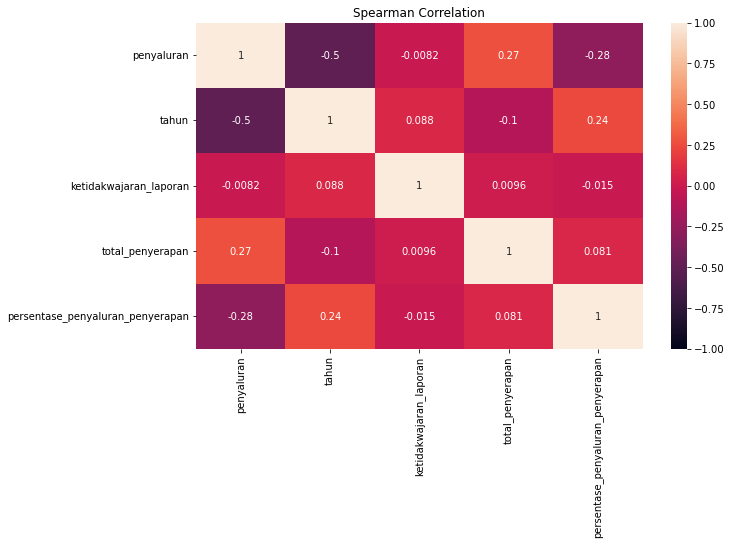

In [41]:
r_simple=display_correlation(df_full)

In [42]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3832 entries, 0 to 3831
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   kode_desa                         3832 non-null   object 
 1   pagu                              3832 non-null   object 
 2   penyaluran                        3832 non-null   float64
 3   tahun                             3832 non-null   int64  
 4   ketidakwajaran_laporan            3832 non-null   int32  
 5   total_penyerapan                  3832 non-null   int64  
 6   persentase_penyaluran_penyerapan  3832 non-null   float64
dtypes: float64(2), int32(1), int64(2), object(2)
memory usage: 194.7+ KB


# Make Isolation Forest

In [43]:
df_full_train = df_full.drop(columns=['kode_desa', 'pagu', 'tahun'])
df_full_train

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan
0,1.017668e+09,0,532151075,52.291226
1,7.073930e+08,0,705597100,99.746124
2,6.973530e+08,0,500660050,71.794349
3,7.155440e+08,0,529999200,74.069407
4,8.377750e+08,0,998566359,119.192666
...,...,...,...,...
3827,7.518624e+07,1,185670000,246.946782
3828,3.553836e+08,0,371354200,104.493905
3829,4.994400e+08,0,303153400,60.698663
3830,1.204744e+09,0,586371400,48.671867


In [44]:
from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples='auto',random_state=rs, contamination='auto') 
clf.fit(df_full_train)
if_scores = clf.decision_function(df_full_train)
if_anomalies=clf.predict(df_full_train)
df_full_train['anomaly_score'] = if_scores
df_full_train['anomaly'] = if_anomalies

In [45]:
df_full_train

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly
0,1.017668e+09,0,532151075,52.291226,0.114950,1
1,7.073930e+08,0,705597100,99.746124,0.145000,1
2,6.973530e+08,0,500660050,71.794349,0.140102,1
3,7.155440e+08,0,529999200,74.069407,0.139900,1
4,8.377750e+08,0,998566359,119.192666,0.109428,1
...,...,...,...,...,...,...
3827,7.518624e+07,1,185670000,246.946782,-0.042966,-1
3828,3.553836e+08,0,371354200,104.493905,0.105774,1
3829,4.994400e+08,0,303153400,60.698663,0.113806,1
3830,1.204744e+09,0,586371400,48.671867,0.072852,1


In [46]:
df_full_train.loc[df_full_train['anomaly'] == -1]

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly
22,1.407308e+09,0,1407308000,100.000000,-0.032861,-1
33,1.506575e+09,0,1418084000,94.126346,-0.060211,-1
50,6.959280e+08,4,637728000,91.637066,-0.010998,-1
139,1.533567e+09,0,1533567446,100.000000,-0.081758,-1
196,1.460729e+09,0,1449433996,99.226756,-0.047598,-1
...,...,...,...,...,...,...
3781,6.012240e+07,6,277050800,460.811278,-0.152085,-1
3791,1.369790e+08,0,840669600,613.721340,-0.048634,-1
3797,1.112378e+09,10,1046535370,94.080878,-0.176090,-1
3809,1.901798e+08,0,750067279,394.398943,-0.000377,-1


In [47]:
df_full

,kode_desa,pagu,penyaluran,tahun,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan
0,3529092001,1017668000.0,1.017668e+09,2018,0,532151075,52.291226
1,3520162006,707393000.0,7.073930e+08,2018,0,705597100,99.746124
2,3525152016,697353000.0,6.973530e+08,2018,0,500660050,71.794349
3,3524172013,715544000.0,7.155440e+08,2018,0,529999200,74.069407
4,3507322008,837775000.0,8.377750e+08,2018,0,998566359,119.192666
...,...,...,...,...,...,...,...
3827,3514042003,939828000.0,7.518624e+07,2021,1,185670000,246.946782
3828,3518162020,982209000.0,3.553836e+08,2021,0,371354200,104.493905
3829,3523192009,902400000.0,4.994400e+08,2021,0,303153400,60.698663
3830,3521122008,1305544000.0,1.204744e+09,2021,0,586371400,48.671867


In [48]:
df_full_train['kode_desa'] = df_full['kode_desa']

In [49]:
sorted_df = df_full_train.sort_values(['anomaly_score'], ascending=False)
sorted_df

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
20,6.876930e+08,0,682100000,99.186701,0.148907,1,3519152003
821,6.828360e+08,0,682836000,100.000000,0.148567,1,3507332002
254,6.908370e+08,0,678498000,98.213906,0.148031,1,3506122010
707,6.883420e+08,0,688342000,100.000000,0.147743,1,3502152017
211,6.805020e+08,0,680502000,100.000000,0.147675,1,3502082010
...,...,...,...,...,...,...,...
2275,1.077800e+09,7,2340001200,217.108987,-0.218241,-1,3504072010
2617,1.103811e+09,19,1189039645,107.721308,-0.219917,-1,3513212001
3596,7.421536e+07,14,399248500,537.959393,-0.227280,-1,3507182005
2560,1.029658e+09,10,2092636200,203.236095,-0.231408,-1,3513012009


In [78]:
df1.loc[df1['kode_pum'] == '3519152003']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
18856,Jawa Timur,Kab. Madiun,Banyukambang,3519152003,623.0,1718.0,2018.0,687693000.0,687693000.0
18857,Jawa Timur,Kab. Madiun,Banyukambang,3519152003,623.0,1718.0,2019.0,776688000.0,776688000.0
18858,Jawa Timur,Kab. Madiun,Banyukambang,3519152003,623.0,1718.0,2020.0,925578000.0,925578000.0
18859,Jawa Timur,Kab. Madiun,Banyukambang,3519152003,623.0,1718.0,2021.0,768720000.0,145488000.0


In [79]:
df1.loc[df1['kode_pum'] == '3507332002']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
253129,Jawa Timur,Kab. Malang,Suwaru,3507332002,NaN,NaN,2018.0,682836000.0,682836000.0
253131,Jawa Timur,Kab. Malang,Suwaru,3507332002,NaN,NaN,2019.0,769883000.0,923859600.0
253133,Jawa Timur,Kab. Malang,Suwaru,3507332002,NaN,NaN,2020.0,773242000.0,579931500.0
253135,Jawa Timur,Kab. Malang,Suwaru,3507332002,NaN,NaN,2021.0,762418000.0,60993440.0


In [80]:
df1.loc[df1['kode_pum'] == '3506122010']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
85564,Jawa Timur,Kab. Kediri,Jongbiru,3506122010,1720.0,4481.0,2018.0,690837000.0,690837000.0
85565,Jawa Timur,Kab. Kediri,Jongbiru,3506122010,1720.0,4481.0,2019.0,783125000.0,783125000.0
85566,Jawa Timur,Kab. Kediri,Jongbiru,3506122010,1720.0,4481.0,2020.0,772199000.0,579149250.0
85567,Jawa Timur,Kab. Kediri,Jongbiru,3506122010,1720.0,4481.0,2021.0,763391000.0,186856400.0


In [81]:
df1.loc[df1['kode_pum'] == '3502152017']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
238490,Jawa Timur,Kab. Ponorogo,Sragi,3502152017,506.0,1680.0,2018.0,688342000.0,688342000.0
238493,Jawa Timur,Kab. Ponorogo,Sragi,3502152017,506.0,1680.0,2019.0,778875000.0,778875000.0
238496,Jawa Timur,Kab. Ponorogo,Sragi,3502152017,506.0,1680.0,2020.0,765231000.0,573923250.0
238499,Jawa Timur,Kab. Ponorogo,Sragi,3502152017,506.0,1680.0,2021.0,765140000.0,249056000.0


In [82]:
df1.loc[df1['kode_pum'] == '3502082010']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
79822,Jawa Timur,Kab. Ponorogo,Jabung,3502082010,843.0,2999.0,2018.0,680502000.0,680502000.0
79830,Jawa Timur,Kab. Ponorogo,Jabung,3502082010,843.0,2999.0,2019.0,766950000.0,1073730000.0
79838,Jawa Timur,Kab. Ponorogo,Jabung,3502082010,843.0,2999.0,2020.0,772073000.0,579054750.0
79846,Jawa Timur,Kab. Ponorogo,Jabung,3502082010,843.0,2999.0,2021.0,778387000.0,16200000.0


In [83]:
df1.loc[df1['kode_pum'] == '3504072010']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
165947,Jawa Timur,Kab. Tulungagung,Nglurup,3504072010,1326.0,4017.0,2018.0,1123268000.0,1123268000.0
165949,Jawa Timur,Kab. Tulungagung,Nglurup,3504072010,1326.0,4017.0,2019.0,1318652000.0,1318652000.0
165951,Jawa Timur,Kab. Tulungagung,Nglurup,3504072010,1326.0,4017.0,2020.0,1437067000.0,1077800250.0
165953,Jawa Timur,Kab. Tulungagung,Nglurup,3504072010,1326.0,4017.0,2021.0,1321540000.0,993940000.0


In [84]:
df1.loc[df1['kode_pum'] == '3513212001']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
246672,Jawa Timur,Kab. Probolinggo,Sumberbendo,3513212001,NaN,NaN,2018.0,1212197000.0,1212197000.0
246678,Jawa Timur,Kab. Probolinggo,Sumberbendo,3513212001,NaN,NaN,2019.0,1315305000.0,1315305000.0
246684,Jawa Timur,Kab. Probolinggo,Sumberbendo,3513212001,NaN,NaN,2020.0,1471748000.0,1103811000.0
246690,Jawa Timur,Kab. Probolinggo,Sumberbendo,3513212001,NaN,NaN,2021.0,1474207000.0,499682800.0


In [85]:
df1.loc[df1['kode_pum'] == '3507182005']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
247865,Jawa Timur,Kab. Malang,Sumberpasir,3507182005,1918.0,5768.0,2018.0,748542000.0,748542000.0
247866,Jawa Timur,Kab. Malang,Sumberpasir,3507182005,1918.0,5768.0,2019.0,867434000.0,867434000.0
247867,Jawa Timur,Kab. Malang,Sumberpasir,3507182005,1918.0,5768.0,2020.0,868229000.0,651171750.0
247868,Jawa Timur,Kab. Malang,Sumberpasir,3507182005,1918.0,5768.0,2021.0,927692000.0,74215360.0


In [86]:
df1.loc[df1['kode_pum'] == '3513012009']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
243546,Jawa Timur,Kab. Probolinggo,Sukapura,3513012009,1185.0,4027.0,2018.0,912961000.0,912961000.0
243555,Jawa Timur,Kab. Probolinggo,Sukapura,3513012009,1185.0,4027.0,2019.0,1102536000.0,1102536000.0
243564,Jawa Timur,Kab. Probolinggo,Sukapura,3513012009,1185.0,4027.0,2020.0,1372877000.0,1029657750.0
243573,Jawa Timur,Kab. Probolinggo,Sukapura,3513012009,1185.0,4027.0,2021.0,1503722000.0,797233200.0


In [87]:
df1.loc[df1['kode_pum'] == '3504132008']

,nama_provinsi,nama_pemda,nama_desa,kode_pum,jumlah_kk,jumlah_penduduk,tahun,pagu,penyaluran
259084,Jawa Timur,Kab. Tulungagung,Tanen,3504132008,1577.0,5134.0,2018.0,770133000.0,770133000.0
259085,Jawa Timur,Kab. Tulungagung,Tanen,3504132008,1577.0,5134.0,2019.0,917060000.0,917060000.0
259086,Jawa Timur,Kab. Tulungagung,Tanen,3504132008,1577.0,5134.0,2020.0,927359000.0,695519250.0
259087,Jawa Timur,Kab. Tulungagung,Tanen,3504132008,1577.0,5134.0,2021.0,1027560000.0,226224000.0


In [60]:
sorted_df.loc[(sorted_df['penyaluran'] >= 5.629113e+08) & (sorted_df['anomaly'] == -1)]

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
2284,7.376348e+08,1,1295710170,175.657420,-0.000192,-1,3507262006
1487,8.664140e+08,3,351045400,40.517051,-0.000461,-1,3506232006
2535,7.323682e+08,0,1570171800,214.396487,-0.001236,-1,3512082001
1984,1.355546e+09,0,1290048850,95.168244,-0.001937,-1,3509062004
2107,5.803470e+08,3,812270925,139.962975,-0.002017,-1,3501052003
...,...,...,...,...,...,...,...
3641,6.276416e+08,25,925865452,147.514991,-0.203949,-1,3501092010
3379,6.388184e+08,26,451574000,70.688947,-0.206291,-1,3504032003
2275,1.077800e+09,7,2340001200,217.108987,-0.218241,-1,3504072010
2617,1.103811e+09,19,1189039645,107.721308,-0.219917,-1,3513212001


In [61]:
sorted_df.loc[(sorted_df['penyaluran'] < 5.629113e+08) & (sorted_df['anomaly'] == -1)]

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
3809,190179840.0,0,750067279,394.398943,-0.000377,-1,3579022003
3026,93324320.0,0,482580400,517.100366,-0.000463,-1,3526142014
2487,446950500.0,0,1211792900,271.124632,-0.000478,-1,3514192005
2557,560474250.0,1,1017768000,181.590501,-0.000728,-1,3522282010
3549,212192640.0,1,319015800,150.342538,-0.001074,-1,3522242003
...,...,...,...,...,...,...,...
2043,403831000.0,15,509229800,126.099730,-0.197909,-1,3529032008
3335,39600000.0,0,1226558200,3097.369192,-0.206093,-1,3507242008
3276,17332800.0,0,964717500,5565.849142,-0.206629,-1,3527062008
3596,74215360.0,14,399248500,537.959393,-0.227280,-1,3507182005


In [67]:
df_full_train

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
0,1.017668e+09,0,532151075,52.291226,0.114950,1,3529092001
1,7.073930e+08,0,705597100,99.746124,0.145000,1,3520162006
2,6.973530e+08,0,500660050,71.794349,0.140102,1,3525152016
3,7.155440e+08,0,529999200,74.069407,0.139900,1,3524172013
4,8.377750e+08,0,998566359,119.192666,0.109428,1,3507322008
...,...,...,...,...,...,...,...
3827,7.518624e+07,1,185670000,246.946782,-0.042966,-1,3514042003
3828,3.553836e+08,0,371354200,104.493905,0.105774,1,3518162020
3829,4.994400e+08,0,303153400,60.698663,0.113806,1,3523192009
3830,1.204744e+09,0,586371400,48.671867,0.072852,1,3521122008


In [69]:
not_anomaly_df = df_full_train.loc[df_full_train['anomaly'] == 1]
not_anomaly_df

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
0,1.017668e+09,0,532151075,52.291226,0.114950,1,3529092001
1,7.073930e+08,0,705597100,99.746124,0.145000,1,3520162006
2,6.973530e+08,0,500660050,71.794349,0.140102,1,3525152016
3,7.155440e+08,0,529999200,74.069407,0.139900,1,3524172013
4,8.377750e+08,0,998566359,119.192666,0.109428,1,3507322008
...,...,...,...,...,...,...,...
3826,2.896552e+08,0,429951070,148.435474,0.099157,1,3523032012
3828,3.553836e+08,0,371354200,104.493905,0.105774,1,3518162020
3829,4.994400e+08,0,303153400,60.698663,0.113806,1,3523192009
3830,1.204744e+09,0,586371400,48.671867,0.072852,1,3521122008


In [71]:
anommaly_df = df_full_train.loc[df_full_train['anomaly'] == -1]
anommaly_df

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly,kode_desa
22,1.407308e+09,0,1407308000,100.000000,-0.032861,-1,3502022003
33,1.506575e+09,0,1418084000,94.126346,-0.060211,-1,3526172013
50,6.959280e+08,4,637728000,91.637066,-0.010998,-1,3523022007
139,1.533567e+09,0,1533567446,100.000000,-0.081758,-1,3509092001
196,1.460729e+09,0,1449433996,99.226756,-0.047598,-1,3511032002
...,...,...,...,...,...,...,...
3781,6.012240e+07,6,277050800,460.811278,-0.152085,-1,3522092015
3791,1.369790e+08,0,840669600,613.721340,-0.048634,-1,3512152008
3797,1.112378e+09,10,1046535370,94.080878,-0.176090,-1,3513232008
3809,1.901798e+08,0,750067279,394.398943,-0.000377,-1,3579022003


In [73]:
not_anomaly_df.describe()

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly
count,3.390000e+03,3390.000000,3.390000e+03,3390.000000,3390.000000,3390.0
mean,7.067920e+08,0.076991,5.822635e+08,97.182630,0.104061,1.0
std,2.759459e+08,0.362325,2.898843e+08,65.031794,0.037743,0.0
min,5.906056e+07,0.000000,7.800000e+06,0.920113,0.000410,1.0
25%,5.739369e+08,0.000000,3.555794e+08,55.441615,0.079982,1.0
50%,7.285765e+08,0.000000,5.526739e+08,89.484574,0.117901,1.0
75%,8.617136e+08,0.000000,7.603987e+08,120.439198,0.135948,1.0
max,1.476871e+09,3.000000,1.559815e+09,533.017348,0.148907,1.0


In [77]:
anommaly_df.describe()

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly
count,4.420000e+02,442.000000,4.420000e+02,442.000000,442.000000,442.0
mean,7.719800e+08,3.085973,7.714435e+08,303.647155,-0.072523,-1.0
std,8.344717e+08,4.403342,5.711940e+08,663.077796,0.056301,0.0
min,3.300000e+06,0.000000,0.000000e+00,0.000000,-0.231803,-1.0
25%,2.865214e+08,0.000000,3.283812e+08,46.761067,-0.107284,-1.0
50%,7.307186e+08,1.000000,6.416127e+08,125.839939,-0.059892,-1.0
75%,1.092834e+09,5.000000,1.118160e+09,241.132603,-0.025291,-1.0
max,1.454654e+10,30.000000,3.304458e+09,6752.779688,-0.000192,-1.0


In [74]:
not_anomaly_df.median()

penyaluran                          7.285765e+08
ketidakwajaran_laporan              0.000000e+00
total_penyerapan                    5.526739e+08
persentase_penyaluran_penyerapan    8.948457e+01
anomaly_score                       1.179013e-01
anomaly                             1.000000e+00
kode_desa                           3.516062e+09
dtype: float64

In [76]:
anommaly_df.median()

penyaluran                          7.307186e+08
ketidakwajaran_laporan              1.000000e+00
total_penyerapan                    6.416127e+08
persentase_penyaluran_penyerapan    1.258399e+02
anomaly_score                      -5.989242e-02
anomaly                            -1.000000e+00
kode_desa                           3.513232e+09
dtype: float64

In [63]:
sorted_df.describe()

,penyaluran,ketidakwajaran_laporan,total_penyerapan,persentase_penyaluran_penyerapan,anomaly_score,anomaly
count,3.832000e+03,3832.000000,3.832000e+03,3832.000000,3832.000000,3832.000000
mean,7.143111e+08,0.424061,6.040844e+08,120.997171,0.083693,0.769311
std,3.846466e+08,1.808930,3.399232e+08,242.289667,0.069338,0.638958
min,3.300000e+06,0.000000,0.000000e+00,0.000000,-0.231803,-1.000000
25%,5.629113e+08,0.000000,3.530107e+08,54.850314,0.058779,1.000000
50%,7.287200e+08,0.000000,5.579278e+08,91.803658,0.109452,1.000000
75%,8.744792e+08,0.000000,7.790154e+08,127.701886,0.134099,1.000000
max,1.454654e+10,30.000000,3.304458e+09,6752.779688,0.148907,1.000000


In [64]:
sorted_df.median()

penyaluran                          7.287200e+08
ketidakwajaran_laporan              0.000000e+00
total_penyerapan                    5.579278e+08
persentase_penyaluran_penyerapan    9.180366e+01
anomaly_score                       1.094516e-01
anomaly                             1.000000e+00
kode_desa                           3.515182e+09
dtype: float64

In [65]:
import shap
explainer = shap.Explainer(clf)
shap_values = explainer(df_full_train)

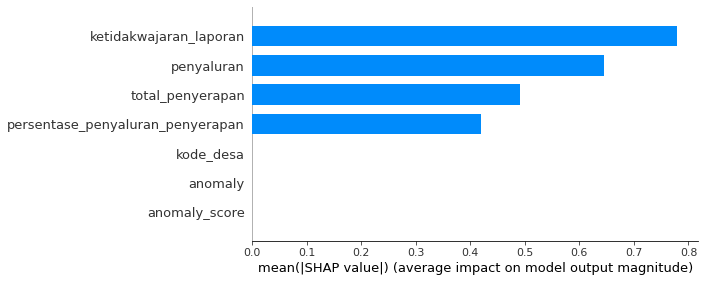

In [66]:
shap.summary_plot(shap_values, df_full_train, plot_type="bar")

In [69]:
conda list

# packages in environment at C:\ProgramData\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0            py39haa95532_0  
alabaster                 0.7.12             pyhd3eb1b0_0  
anaconda                  2021.11                  py39_0  
anaconda-client           1.9.0            py39haa95532_0  
anaconda-navigator        2.1.1                    py39_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py39haa95532_2  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2           py39haa95532_0  
argon2-cffi               20.1.0           py39h2bbff1b_1  
arrow                     0.13.1           py39haa95532_0  
asn1crypto                1.4.0                      py_0  
astroid                   2.6.6            py39haa95532_0  
astropy                   4.3.1            py39hc7d831d_0  
async_generator           1.10      

pycosat                   0.6.3            py39h2bbff1b_0  
pycparser                 2.20                       py_2  
pycurl                    7.44.1           py39hcd4344a_1  
pydocstyle                6.1.1              pyhd3eb1b0_0  
pyerfa                    2.0.0            py39h2bbff1b_0  
pyflakes                  2.3.1              pyhd3eb1b0_0  
pygments                  2.10.0             pyhd3eb1b0_0  
pyjwt                     2.1.0            py39haa95532_0  
pylint                    2.9.6            py39haa95532_1  
pyls-spyder               0.4.0              pyhd3eb1b0_0  
pynacl                    1.4.0            py39hbd8134f_1  
pyodbc                    4.0.31           py39hd77b12b_0  
pyopenssl                 21.0.0             pyhd3eb1b0_1  
pyparsing                 3.0.4              pyhd3eb1b0_0  
pyqt                      5.9.2            py39hd77b12b_6  
pyreadline                2.1              py39haa95532_1  
pyrsistent                0.18.0        

In [ ]:
cmap=np.array(['white','red'])
plt.scatter(df_full_DBSCAN.iloc[:,0],df_full_DBSCAN.iloc[:,1],c='white',s=20,edgecolor='k')
# plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('total_penyerapan')
plt.ylabel('selisih_penyaluran_penyerapan')
plt.title('Isolation Forests - Anomalies')

In [ ]:
cmap = cm.get_cmap('Set1')
df_full_DBSCAN.plot.scatter(x='selisih_penyaluran_penyerapan',y='total_penyerapan', c=clusters, cmap=cmap,
 colorbar = False)

In [ ]:
clusters.unique()

In [ ]:
outlier_detection = DBSCAN(
                    eps = 500, 
                    metric="euclidean", 
                    min_samples = 5,
                    n_jobs = -1)

clusters = outlier_detection.fit_predict(df_full_DBSCAN)

In [ ]:
df_full_DBSCAN = df_full_DBSCAN.fillna(0)

In [ ]:
from sklearn import svm
clf=svm.OneClassSVM(nu=.2,kernel='rbf',gamma=.001)
clf.fit(df_full_DBSCAN)
y_pred=clf.predict(df_full_DBSCAN)

In [ ]:
df_full_DBSCAN['y'] = y_pred
df_full_test = df_full
df_full_test['y'] = y_pred
df_full_test

In [ ]:
df_full_test.loc[df_full_test['y'] == -1]

In [ ]:
df_desa.loc[df_desa['nama_desa'] == 'Widodaren']

In [ ]:
df_full_DBSCAN.plot.scatter(x='total_penyerapan',y='selisih_penyaluran_penyerapan', c=y_pred, cmap=cmap, colorbar = False)
plt.title('One-Class SVM — Anomalies');

In [ ]:
df_sum_realisasi_3 = df_penyerapan.groupby('nama_desa', as_index=False).sum()
df_sum_realisasi_3.loc[df_sum_realisasi_3['nama_desa'] == 'Aan']

In [ ]:
df_desa = df1
df_desa_jatim = df_desa.loc[df_penyerapan['nama_provinsi'] == 'Jawa Timur']
df_desa 

In [ ]:
df_desa.info()

In [ ]:
df_desa = df_desa.drop([298704])

In [ ]:
df_desa['jumlah_kk'] = df_desa['jumlah_kk'].astype(str).astype(float)
df_desa.info()

In [ ]:
df_desa['jumlah_penduduk'] = df_desa['jumlah_penduduk'].astype(str).astype(float)
df_desa['tahun'] = df_desa['tahun'].astype(str).astype(float)
df_desa['pagu'] = df_desa['pagu'].astype(str).astype(float)
df_desa['penyaluran'] = df_desa['penyaluran'].astype(str).astype(float)
df_desa.info()

In [ ]:
df_desa.isna().sum()

In [ ]:
df_desa = df_desa.drop(columns=['jumlah_kk', 'jumlah_penduduk'])

In [ ]:
bool_series = pd.isnull(df_desa["tahun"])
df_desa[bool_series]

In [ ]:
df_desa = df_desa.drop([167098])

In [ ]:
df_desa.isna().sum()

In [ ]:
df_desa['tahun'] = df_desa['tahun'].astype(float).astype(int)
df_desa.info()

In [ ]:
df_desa = df_desa.fillna(0)

In [ ]:
df_desa = df_desa.reset_index(drop=True)

In [ ]:
tiap_provinsi = df_desa[['nama_provinsi', 'pagu', 'penyaluran']].copy()
tiap_provinsi = tiap_provinsi.groupby('nama_provinsi', as_index=False).sum()

In [ ]:
tiap_provinsi

In [ ]:
plt.figure(figsize=(9, 10))
sns.countplot(data=tiap_provinsi, y='nama_provinsi')
plt.title('Top 10 Athletes with the most awarded Medals')
plt.xlabel('No. of awrded medals')
plt.ylabel('Athlete Name');

In [ ]:
df_2021 = df_desa['tahun'] == 2021
df_2021

In [ ]:
df_2021 = df_desa[df_2021]

In [ ]:
df_2021 = df_2021.reset_index(drop=True)
df_2021

In [ ]:
tiap_provinsi = df_2021[['nama_provinsi', 'pagu', 'penyaluran']].copy()
tiap_provinsi = tiap_provinsi.groupby('nama_provinsi', as_index=False).sum()
tiap_provinsi.head()

In [ ]:
plt.figure(figsize=(10,8))
tiap_provinsi_pagu = tiap_provinsi.sort_values('pagu', ascending=False)
tiap_provinsi_pagu = tiap_provinsi_pagu.head(10)
tiap_provinsi_pagu = tiap_provinsi_pagu.sort_values('pagu', ascending=True)
plt.barh(tiap_provinsi_pagu['nama_provinsi'], tiap_provinsi_pagu['pagu'])
plt.title('Provinsi vs Jumlah Pagu 2021')
plt.xlabel('Jumlah Pagu')
plt.ylabel('Provinsi')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
tiap_provinsi_penyaluran = tiap_provinsi.sort_values('penyaluran', ascending=False)
tiap_provinsi_penyaluran = tiap_provinsi_penyaluran.head(10)
tiap_provinsi_penyaluran = tiap_provinsi_penyaluran.sort_values('penyaluran', ascending=True)
plt.barh(tiap_provinsi_penyaluran['nama_provinsi'], tiap_provinsi_penyaluran['penyaluran'])
plt.title('Provinsi vs Jumlah Penyaluran 2021')
plt.xlabel('Jumlah Penyaluran')
plt.ylabel('Provinsi')
plt.show()

In [ ]:
tiap_provinsi_penyaluran.head(5)

In [ ]:
# belum adanya alur yang jelas mau dimana eda tersebut
# belum sambung menyambung tiap story
# general to spesifik
# teknis visualisasi
# descending tiap categorical
# categorical ke sumber y 
# boxplot, line chart, pie chart, bar chart, scatter plot, histogram, 
# bar chart -> categoric , numeric (tidak bisa terlalu banyak data point, tidak bisa banyak categori) maks 15
# pie chart -> maks 5 kategori -> ubah ke lainnya
# line chart -> time series
# maks 15 categori -> ubah ke lainnya
# diisi title
# y axis x axis to change
#  warnanya samain aja
#  1 warna to highlight
sns.countplot(x='tahun', data=df, colors='blue')
plt.title('tahun vs count')
plt.show()

In [ ]:
sns.countplot(x='nama_provinsi', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df.loc[df["nama_provinsi"] == 'Jawa Timur']
df = df.reset_index(drop=True)
df

In [ ]:
sns.countplot(x='nama_pemda', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
sns.countplot(x='nama_bidang', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df

In [ ]:
dftest = df1.loc[df1["kode_pum"] == 3525122011]
dftest = df1.reset_index(drop=True)
dftest